<a href="https://colab.research.google.com/github/jnsbrdbr/Programming-Exercise_andrewNG/blob/master/Exercise_1_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex1data1.txt
data=pd.read_csv('ex1data1.txt', header=None).values

--2022-07-19 14:58:14--  https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex1data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [text/plain]
Saving to: ‘ex1data1.txt.5’

ex1data1.txt.5      100%[===================>]   1.33K  --.-KB/s    in 0s      

2022-07-19 14:58:14 (80.6 MB/s) - ‘ex1data1.txt.5’ saved [1359/1359]



In [3]:
data

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

In [4]:
type(data)

numpy.ndarray

In [5]:
x=data[:,0].reshape(-1, 1)
y=data[:,1]
M = len(y) 

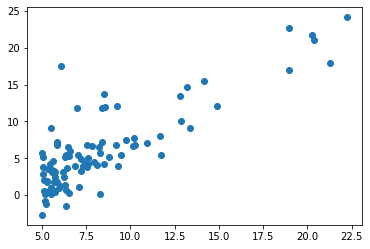

In [6]:
plt.scatter(x, y)

In [7]:
m = y.shape[0]
ones = np.ones((m, 1)) 
X=np.hstack((ones,x))
theta = np.zeros(2)

In [8]:
num_iters = 1500
alpha = 0.01

In [9]:
def cost_function(X,y,theta):
  h=X.dot(theta)
  J = (1/(2*m)) * (np.sum((h - y)**2))
  return J

In [10]:
J = cost_function(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)

With theta = [0 ; 0]
Cost computed = 32.072733877455676


In [11]:
J = cost_function(X, y, [-1,2])
print('With theta = [-1 ; 2]\nCost computed =', J)

With theta = [-1 ; 2]
Cost computed = 54.24245508201238


In [12]:
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    theta_0 = theta.copy()
    for i in range(0, num_iters):
        h = X.dot(theta_0)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta_0 = theta_0 - (alpha * delta.T)
        J_history[i] = cost_function(X, y, theta_0)

    return theta_0, J_history

In [13]:
theta, _ = gradient_descent(X, y, theta, alpha, num_iters)
print('Theta found by gradient descent:\n', theta)

Theta found by gradient descent:
 [-3.63029144  1.16636235]


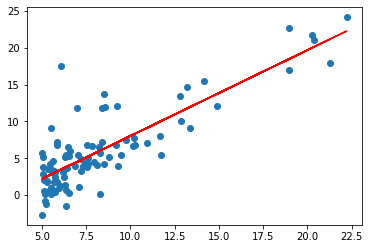

In [14]:
plt.scatter(x, y)
plt.plot(X[:,1], X.dot(theta), color='r')

1.4 Equivalent Code using Scikit-Learn

In [28]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x,y)

LinearRegression()

In [29]:
linear_reg.intercept_, linear_reg.coef_

(-3.8957808783118484, array([1.19303364]))

In [37]:
!wget https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex1data2.txt

data_mul= pd.read_csv('ex1data2.txt',header=None)

--2022-07-19 16:48:56--  https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex1data2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657 [text/plain]
Saving to: ‘ex1data2.txt.2’

ex1data2.txt.2      100%[===================>]     657  --.-KB/s    in 0s      

2022-07-19 16:48:56 (21.5 MB/s) - ‘ex1data2.txt.2’ saved [657/657]



In [38]:
data_mul.columns=('house_size','bedrooms','house_price')
data_mul.describe().T

,count,mean,std,min,25%,50%,75%,max
house_size,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
house_price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


In [47]:
#standardization
def standardization(x,mean=np.zeros(1),std=np.zeros(1)):
  x=np.array(x)
  if len(mean.shape)==1 or len(std.shape)==1:
     mean = np.mean(x, axis=0)
     std = np.std(x, axis=0, ddof=1)
  x=(x-mean)/std
  return x,mean,std

In [43]:
type(data_mul)

pandas.core.frame.DataFrame

In [49]:
x_norm, mu, sigma = standardization(data_mul[['house_size', 'bedrooms']])

In [51]:
data_mul['house_size_normalized'] =x_norm[:,0]
data_mul['bedrooms_normalized'] = x_norm[:,1]
data_mul[['house_size_normalized', 'bedrooms_normalized']].describe().T

,count,mean,std,min,25%,50%,75%,max
house_size_normalized,47.0,3.779483e-17,1.0,-1.445423,-0.715590,-0.141790,0.337635,3.117292
bedrooms_normalized,47.0,2.746030e-16,1.0,-2.851859,-0.223675,-0.223675,1.090417,2.404508


In [55]:
m=data_mul.shape[0]
x_x=np.hstack((np.ones((m,1)),x_norm))
y_y=np.array(data_mul.house_price.values).reshape(-1,1)
theta = np.zeros(shape=(x_x.shape[1],1))
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50

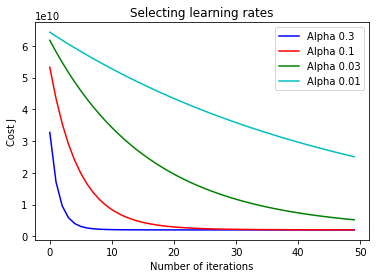

In [56]:
for i in range (0,len(alpha)):
  theta = np.zeros(shape=(x_x.shape[1],1))
  theta, J_history=gradient_descent(x_x, y_y, theta, alpha[i], num_iters)
  plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))

plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [58]:
iterations = 250
alpha = 0.1
theta, _ = gradient_descent(x_x, y_y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[340412.65957372]
 [110630.26530813]
 [ -6648.6893001 ]]


In [59]:
sqft = (1650 - mu[0])/sigma[0]
bedrooms = (3 - mu[1])/sigma[1]
y_pred = theta[0] + theta[1]*sqft + theta[2]*bedrooms
f'Price of a house with 1650 square feet and 3 bedrooms: {y_pred[0]}$'

'Price of a house with 1650 square feet and 3 bedrooms: 293081.63514221634$'